##### Customer Churn Prediction
Churn prediction is identifying customers that are most likely to live a service. This is important for most companies as acquiring new customers is more costlier than retaining old ones, So the results of Churn prediction help companies focus on customers that are likely to churn and develop strategies for retaining those customers.

In [26]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [27]:
#Reading the dataset
df02 = pd.read_csv('User+App+Behaviour.csv')
df02.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123


In [28]:
df02.shape

(5630, 20)

In [29]:
df02.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [30]:
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [31]:
# Find the unique number of values for each variable
df02.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                  220
dtype: int64

In [32]:
df02.duplicated().sum()

0

In [33]:
# Find the unique number of values for each variable
df02.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                  220
dtype: int64

In [34]:
# Unique values for columns
for col in df02.drop(['CustomerID', 'CashbackAmount'], axis=1).columns:
  print('Column Name :', col)
  print(df02[col].unique())
  print('-------------------------------------------------------------')

Column Name : Churn
[1 0]
-------------------------------------------------------------
Column Name : Tenure
[ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
-------------------------------------------------------------
Column Name : PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']
-------------------------------------------------------------
Column Name : CityTier
[3 1 2]
-------------------------------------------------------------
Column Name : WarehouseToHome
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]
-------------------------------------------------------------
Column Name : PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
-------------------------------------------------------------
Column 

### Handling Missing Values

In [35]:
# Checking missing values
df02.isnull().sum().sort_values(ascending=False)

DaySinceLastOrder              307
OrderAmountHikeFromlastYear    265
Tenure                         264
OrderCount                     258
CouponUsed                     256
HourSpendOnApp                 255
WarehouseToHome                251
CustomerID                       0
MaritalStatus                    0
Complain                         0
NumberOfAddress                  0
PreferedOrderCat                 0
SatisfactionScore                0
Churn                            0
NumberOfDeviceRegistered         0
Gender                           0
PreferredPaymentMode             0
CityTier                         0
PreferredLoginDevice             0
CashbackAmount                   0
dtype: int64

In [36]:
# columns with missing values
missing_cols = [col for col in df02.columns if df02[col].isnull().any()]
missing_cols

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder']

In [37]:
# Find the % of missing value in the above list of columns
percent = df02[missing_cols].isnull().sum() * 100/len(df02)
missing_df = pd.DataFrame({'column':missing_cols,
                           'no. of missing values' : df02[missing_cols].isnull().sum().values,
                           'percentage' : percent.values})
missing_df

,column,no. of missing values,percentage
0,Tenure,264,4.689165
1,WarehouseToHome,251,4.458259
2,HourSpendOnApp,255,4.529307
3,OrderAmountHikeFromlastYear,265,4.706927
4,CouponUsed,256,4.547069
5,OrderCount,258,4.582593
6,DaySinceLastOrder,307,5.452931


In [38]:
# Calculate the number of missing values in each row and finding the count
df02.isnull().sum(axis=1).value_counts()

0    3774
1    1856
dtype: int64

In [39]:
# Calculate skewness of missing value columns
df02[missing_cols].skew(axis=0, skipna=True, numeric_only=True)

Tenure                         0.736513
WarehouseToHome                1.619154
HourSpendOnApp                -0.027213
OrderAmountHikeFromlastYear    0.790785
CouponUsed                     2.545653
OrderCount                     2.196414
DaySinceLastOrder              1.191000
dtype: float64

In [40]:
round(df02.HourSpendOnApp.mean()), round(df02.Tenure.mean()), round(df02.OrderAmountHikeFromlastYear.mean()), round(df02.WarehouseToHome.mean())

(3, 10, 16, 16)

In [41]:
df02.CouponUsed.median(), df02.OrderCount.median(), df02.DaySinceLastOrder.median()

(1.0, 2.0, 3.0)

In [42]:
# Fill missing values ith mean and median
df02.fillna({'HourSpendOnApp':round(df02.HourSpendOnApp.mean()), 
           'Tenure':round(df02.Tenure.mean()), 
           'OrderAmountHikeFromlastYear':round(df02.OrderAmountHikeFromlastYear.mean()),
           'WarehouseToHome':round(df02.WarehouseToHome.mean()), 
           'CouponUsed':df02.CouponUsed.median(), 
           'OrderCount':df02.OrderCount.median(), 
           'DaySinceLastOrder':df02.DaySinceLastOrder.median()}, inplace=True)

In [43]:
df02.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [44]:
df02.drop('CustomerID', axis=1, inplace=True) #set inplace true to reflect the change on original dataframe.

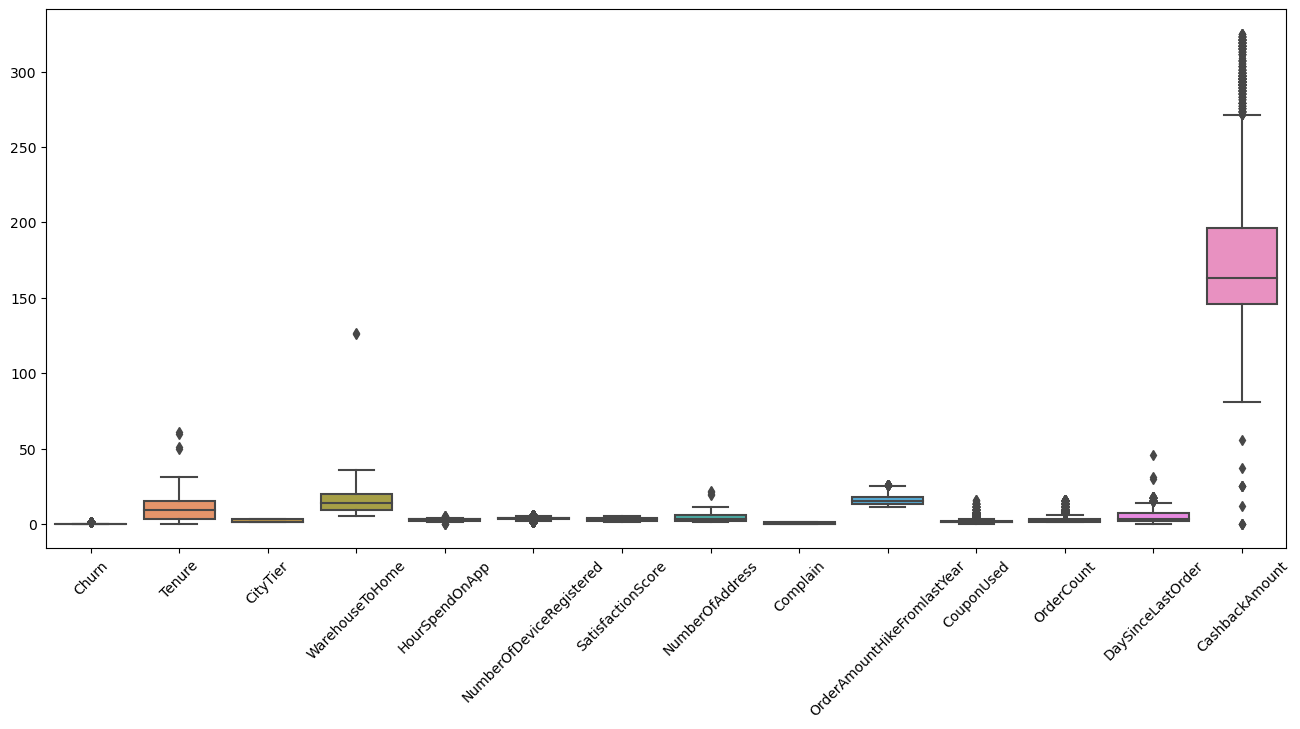

In [45]:
##explore if there are any outliers in our feature columns.

ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=df02)
plt.xticks(rotation=45)
plt.show()

In [46]:
percentile = df02.Tenure.quantile([0.99]).values
df02['Tenure'] = df02['Tenure'].apply(lambda x : percentile[0] if x > percentile[0] else x)
percentile = df02.DaySinceLastOrder.quantile([0.99]).values
df02['DaySinceLastOrder'] = df02['DaySinceLastOrder'].apply(lambda x : percentile[0] if x > percentile[0] else x)
percentile = df02.CashbackAmount.quantile([0.01, 0.99]).values
df02['CashbackAmount'] = df02['CashbackAmount'].apply(lambda x : percentile[0] if x < percentile[0] else percentile[1] if x > percentile[1] else x)
     

### Univariate Analysis

##### Categorical variables

In [55]:
# Get the list of categorical columns
cat = df02.select_dtypes(include=['object']).columns  # Select columns with object (string) data type

# Loop through each categorical column and display the frequency of each unique value
for col in cat:
    print("Column:", col)
    print(df02[col].value_counts())
    print("--------------------------------------")

Column: PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
--------------------------------------
Column: PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
--------------------------------------
Column: Gender
Male      3384
Female    2246
Name: Gender, dtype: int64
--------------------------------------
Column: PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64
--------------------------------------
Column: MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64
--------------------------------------


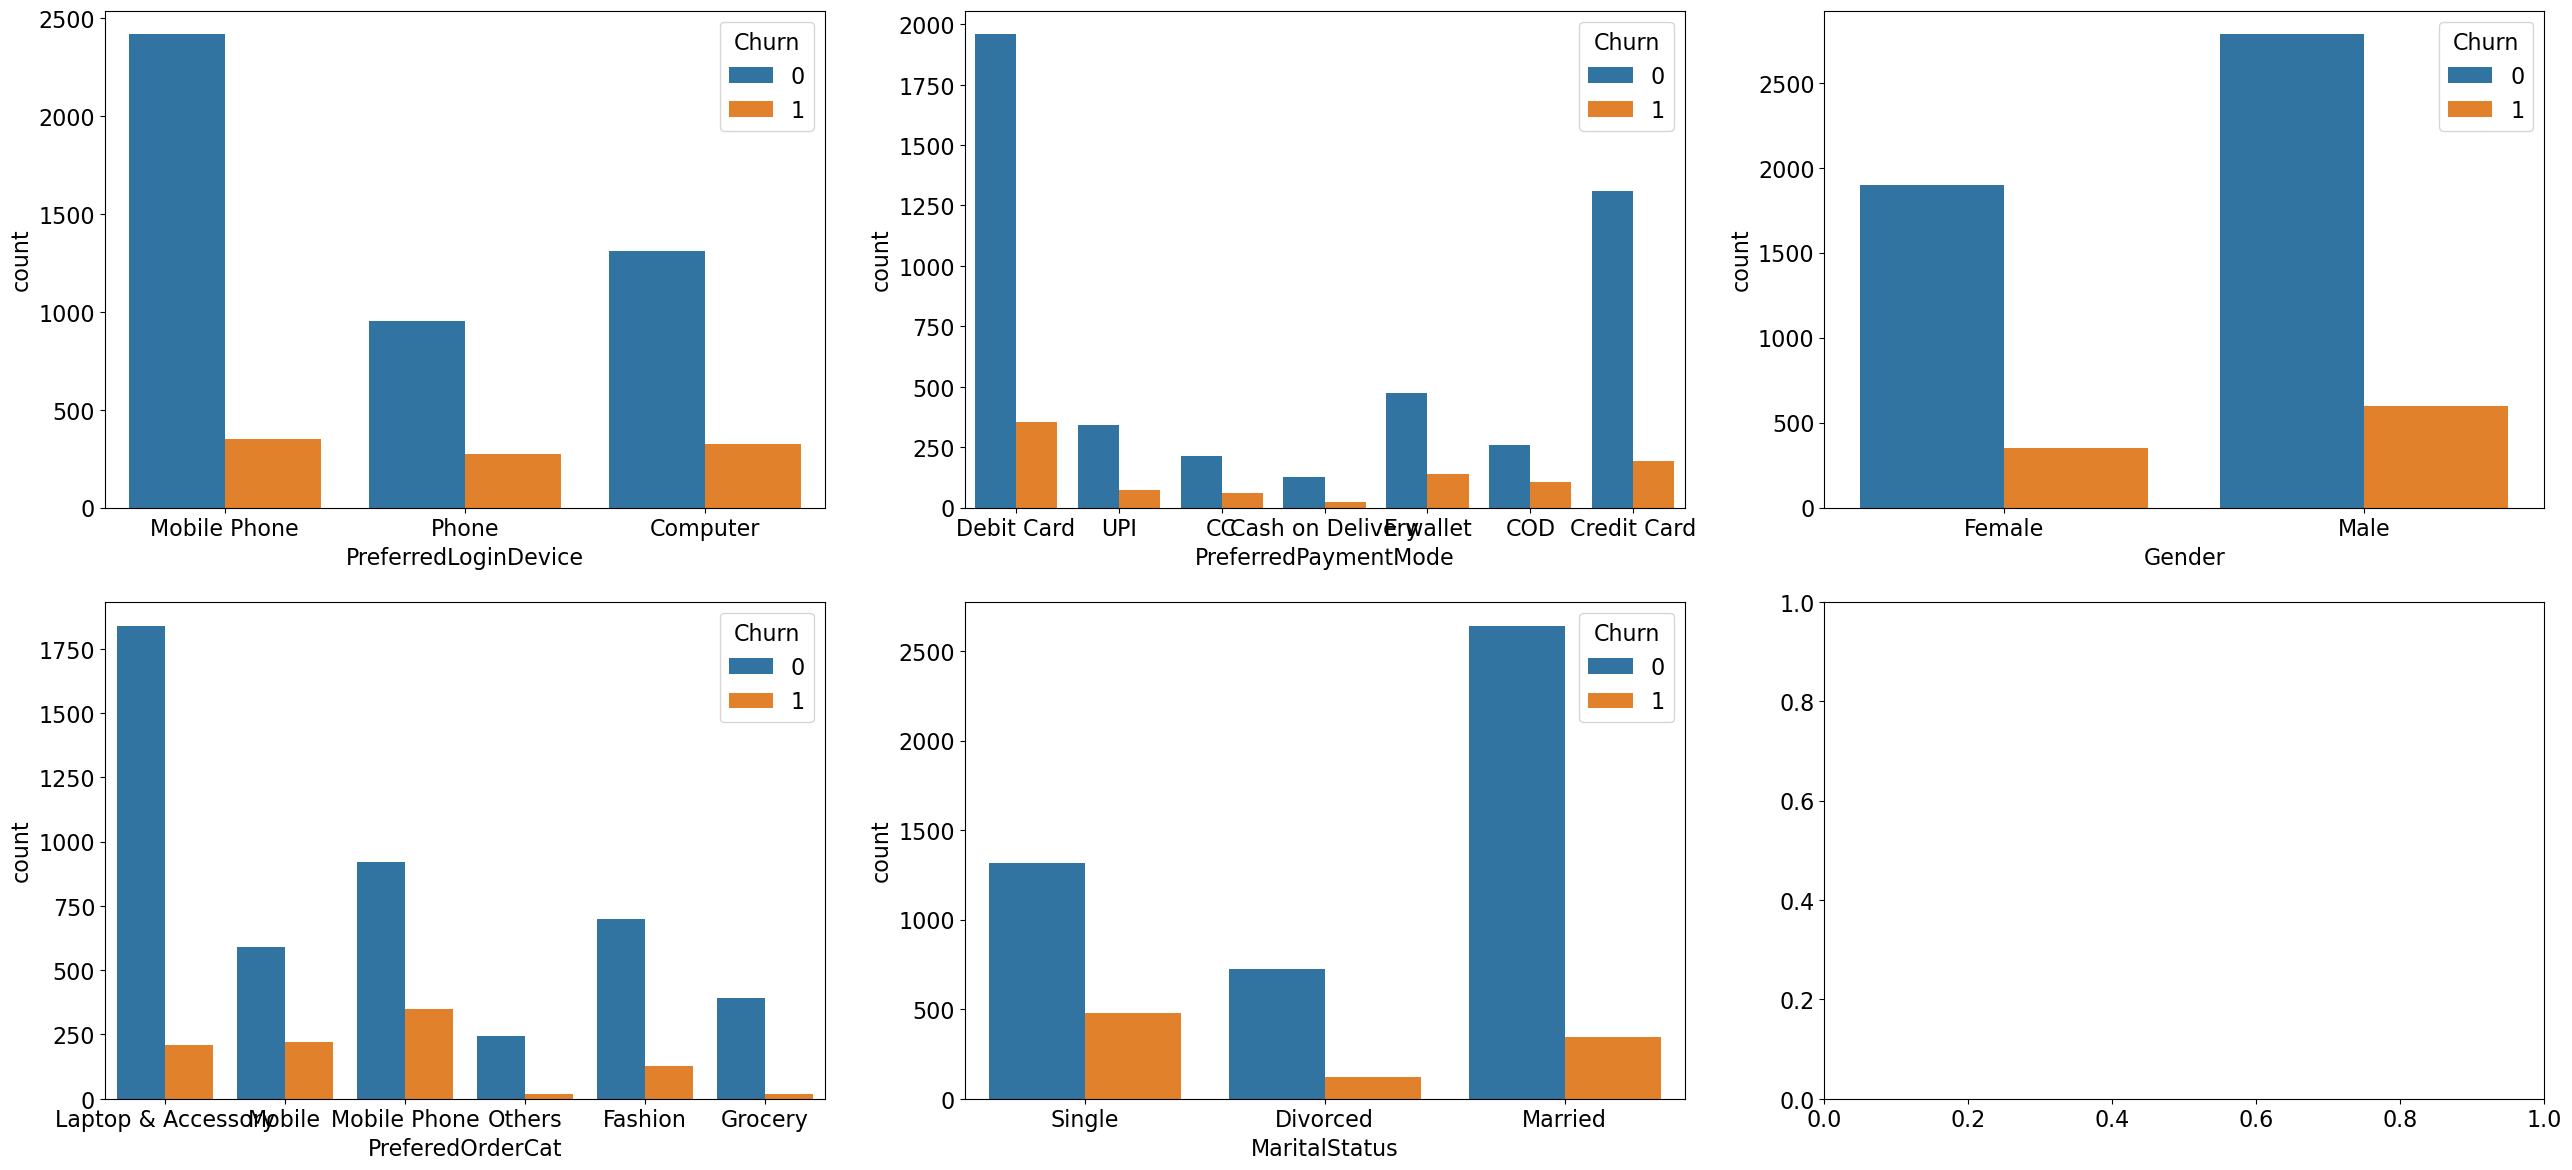

In [57]:
##we will visualise each variable with their corresponding churn value

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(26, 12))
for col, subplot in zip(cat, ax.flatten()):
    sns.countplot(x=df02[col], hue=df02.Churn, ax=subplot)

plt.tight_layout()
plt.show()

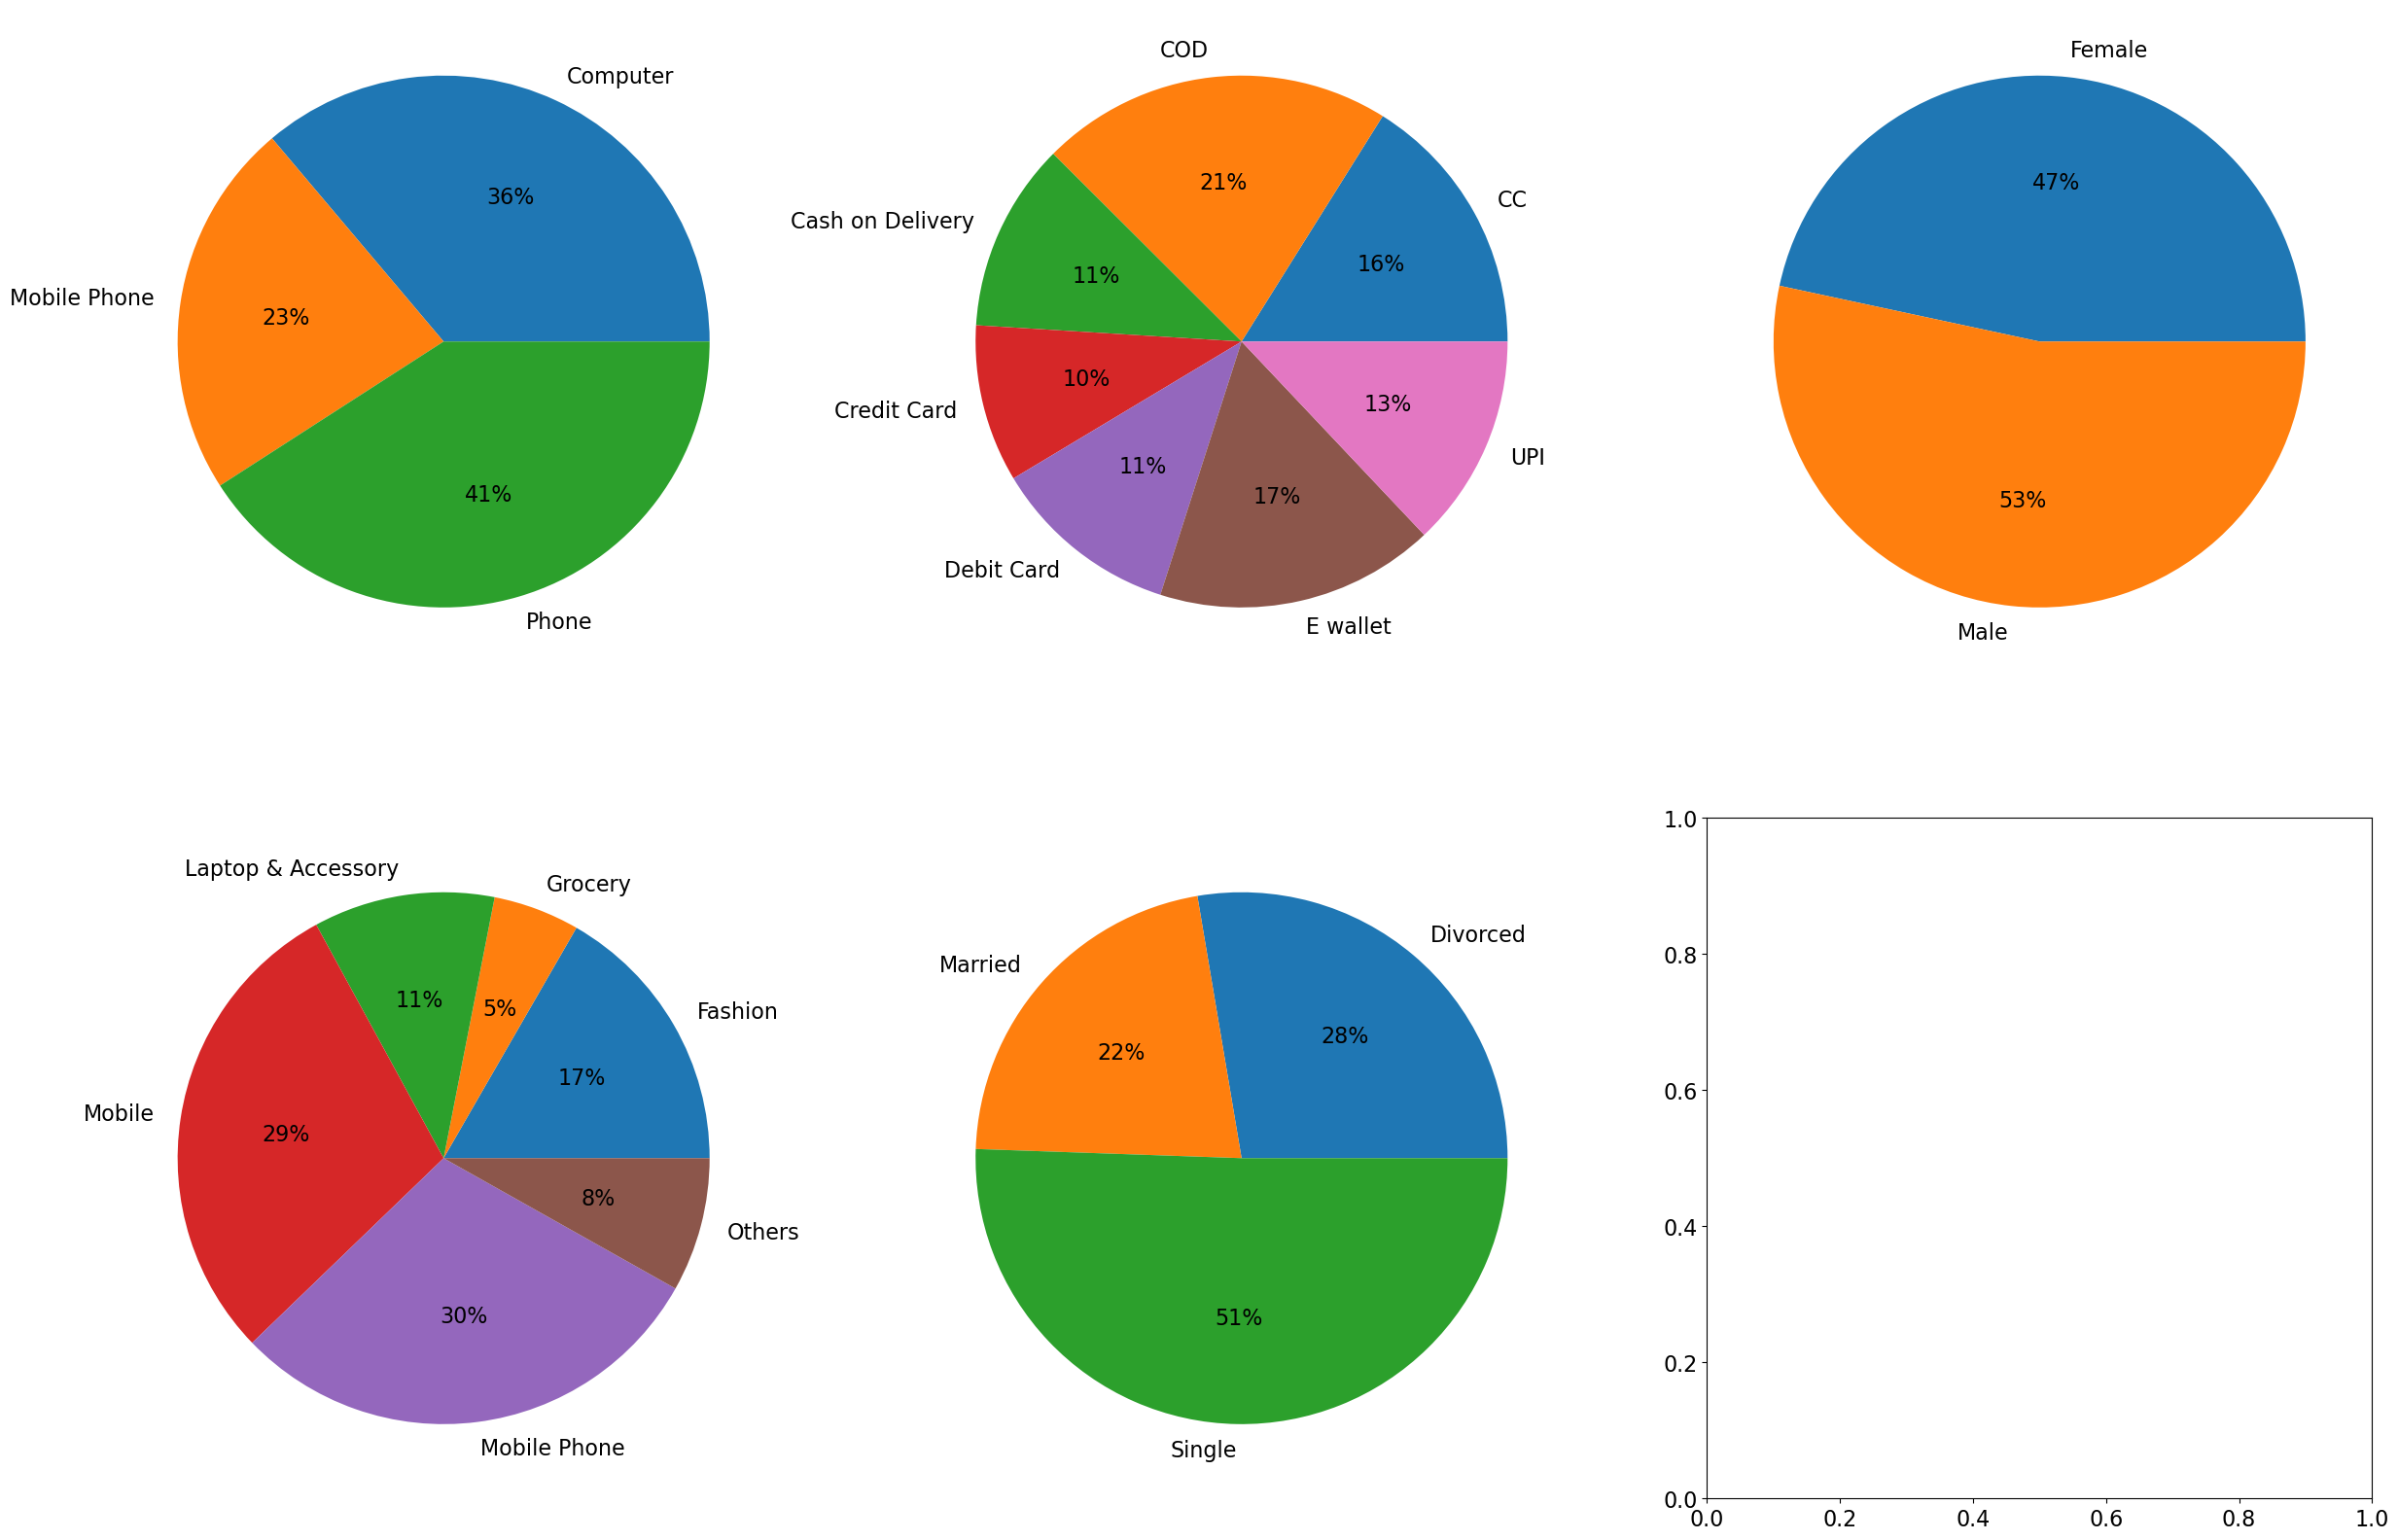

In [58]:
##we can find out the percent churn contributed by each category for each variable.

fig, ax = plt.subplots(2, 3, figsize=(30, 20))
plt.rcParams['font.size'] = '16'
for col,subplot in zip(cat, ax.flatten()):
    #calculate percent churn 
    temp = df02.groupby(by=df02[col]).Churn.sum()
    total = df02.value_counts(col).sort_index()
    res1 = temp/total*100
    #visualising the result
    subplot.pie(labels = res1.index, x = res1.values, autopct='%.0f%%',textprops={'fontsize': 16})

##### Numerical variable

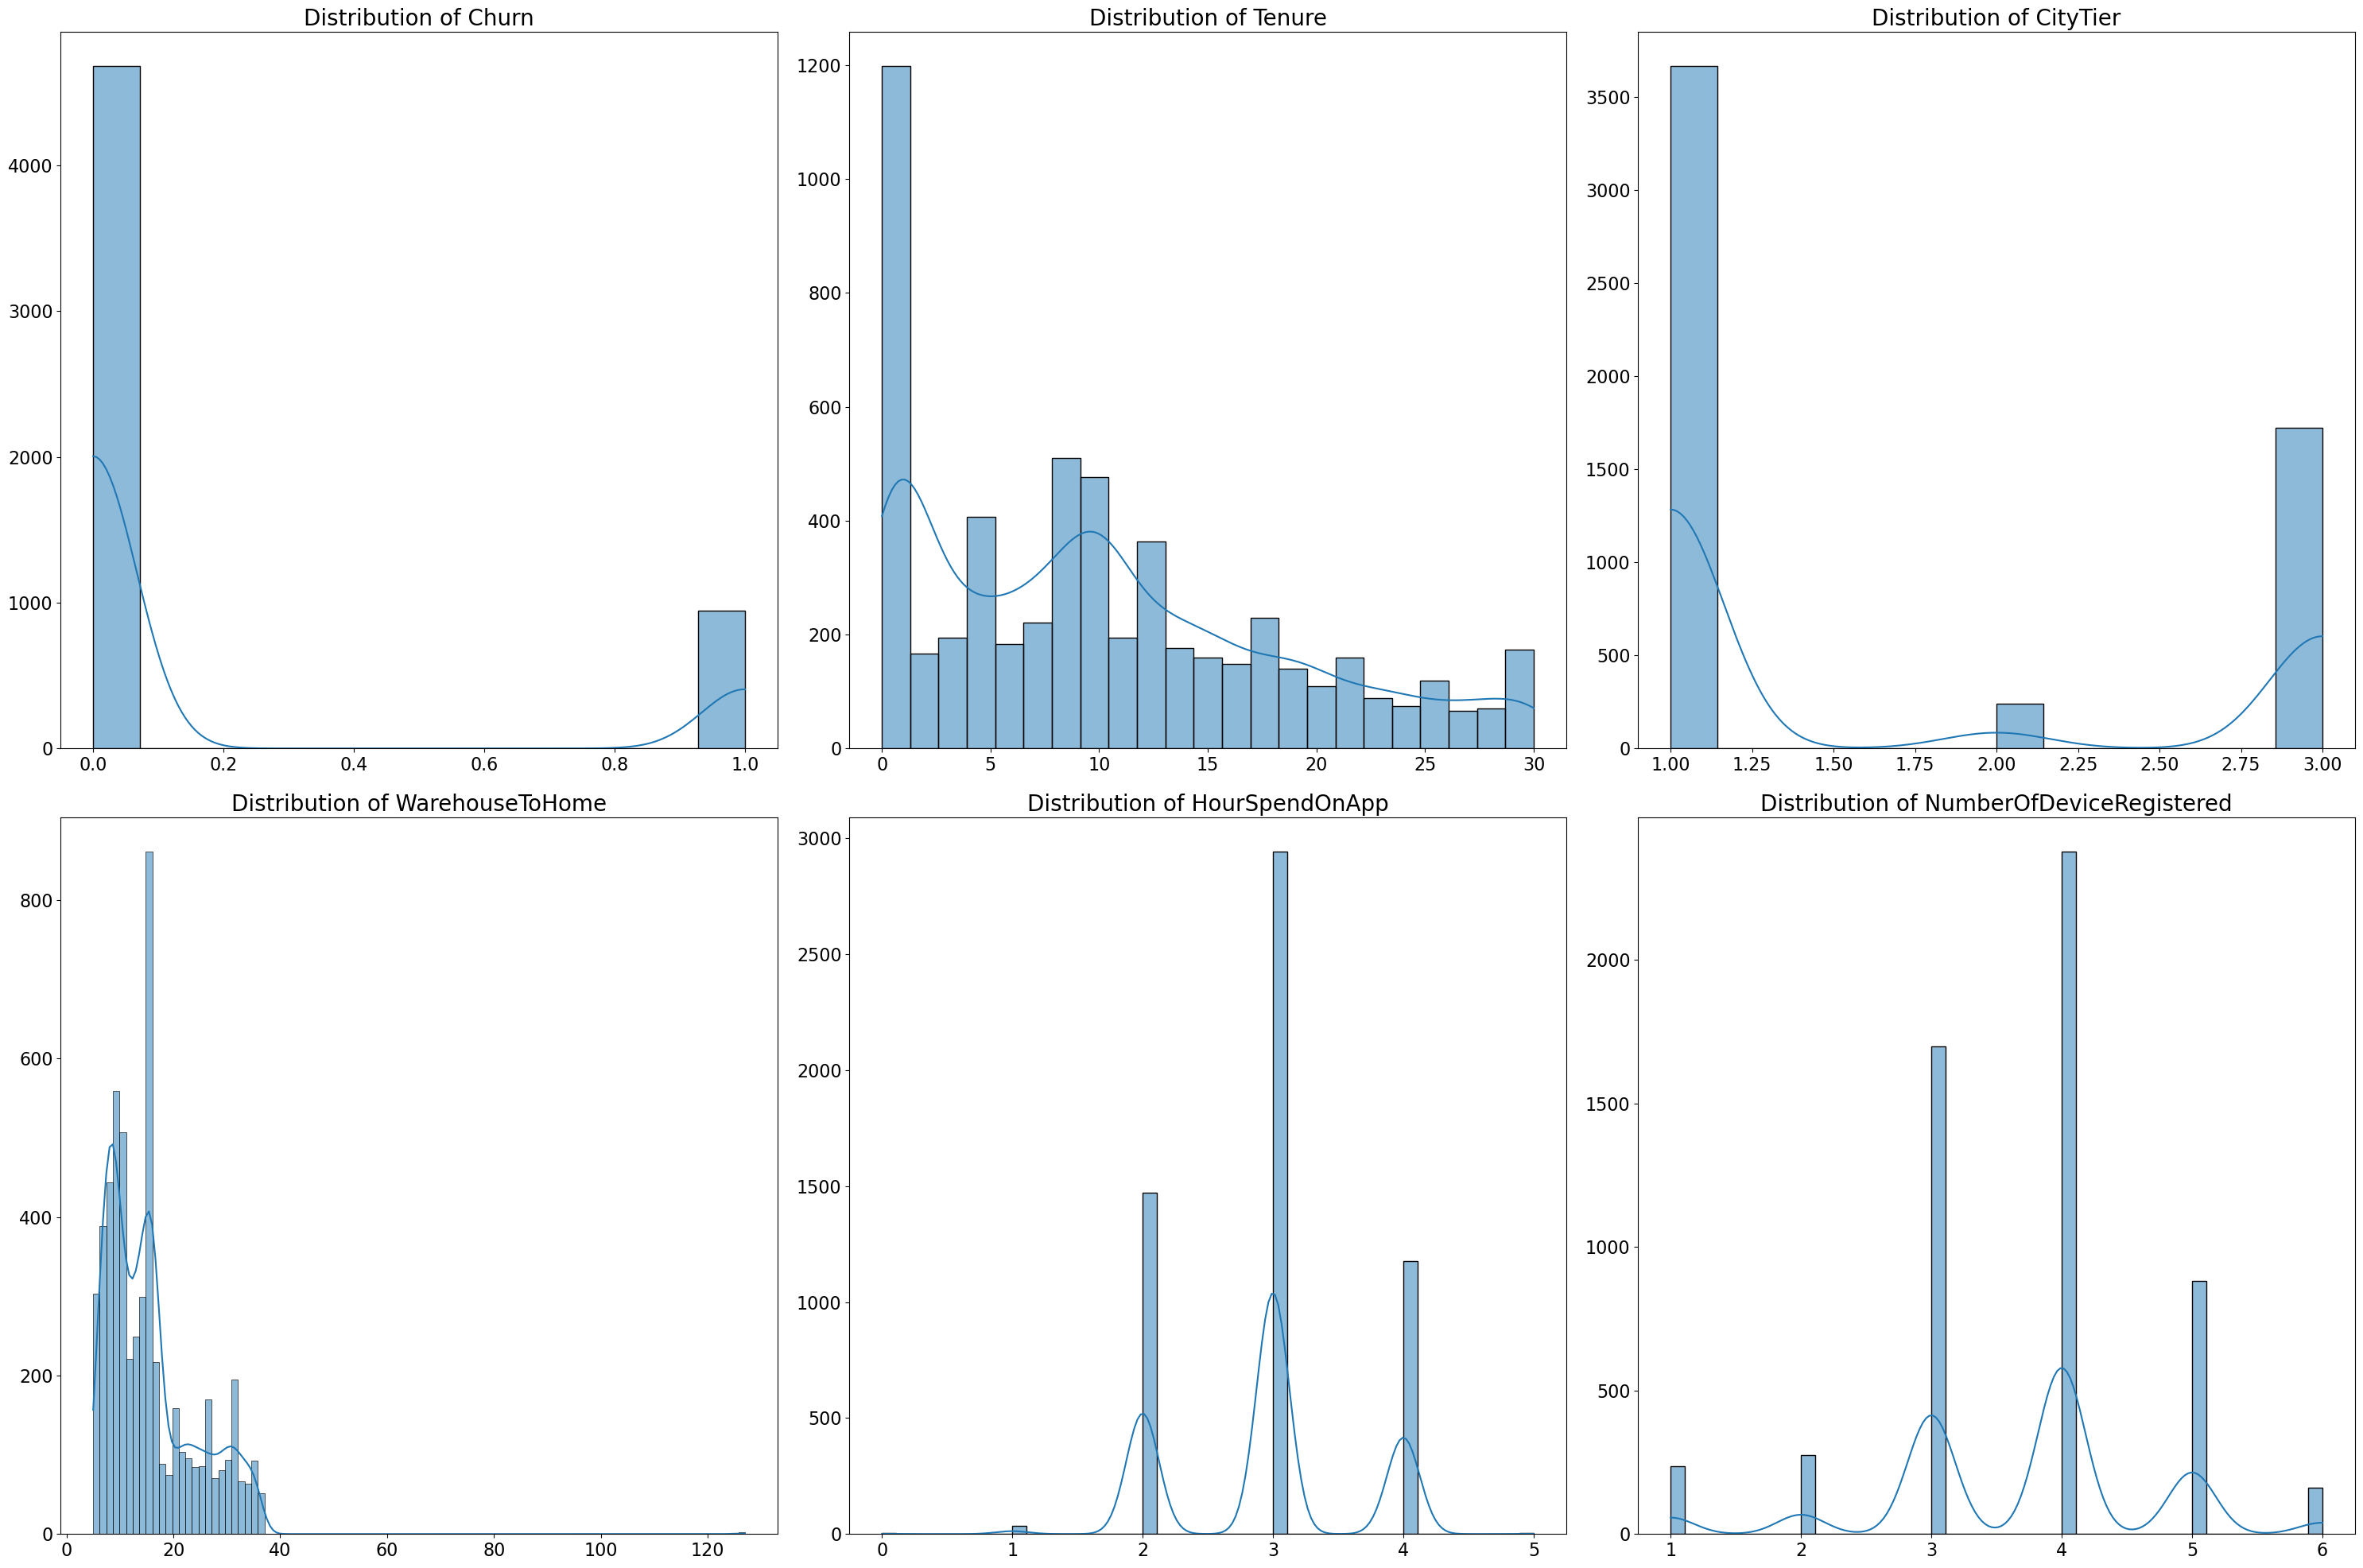

In [61]:
##Visualise distributions
num = list(df02.select_dtypes(exclude='object').columns) #numerical type columns
fig, ax = plt.subplots(2, 3, figsize=(30, 20))
plt.rcParams['font.size'] = '16'

for i, subplot in zip(num, ax.flatten()):
    sns.histplot(df02[i], kde=True, ax=subplot)
    subplot.set_title(f'Distribution of {i}', fontsize=20)
    subplot.set_xlabel('')
    subplot.set_ylabel('')

plt.tight_layout()
plt.show()

#### Bivariate Analysis

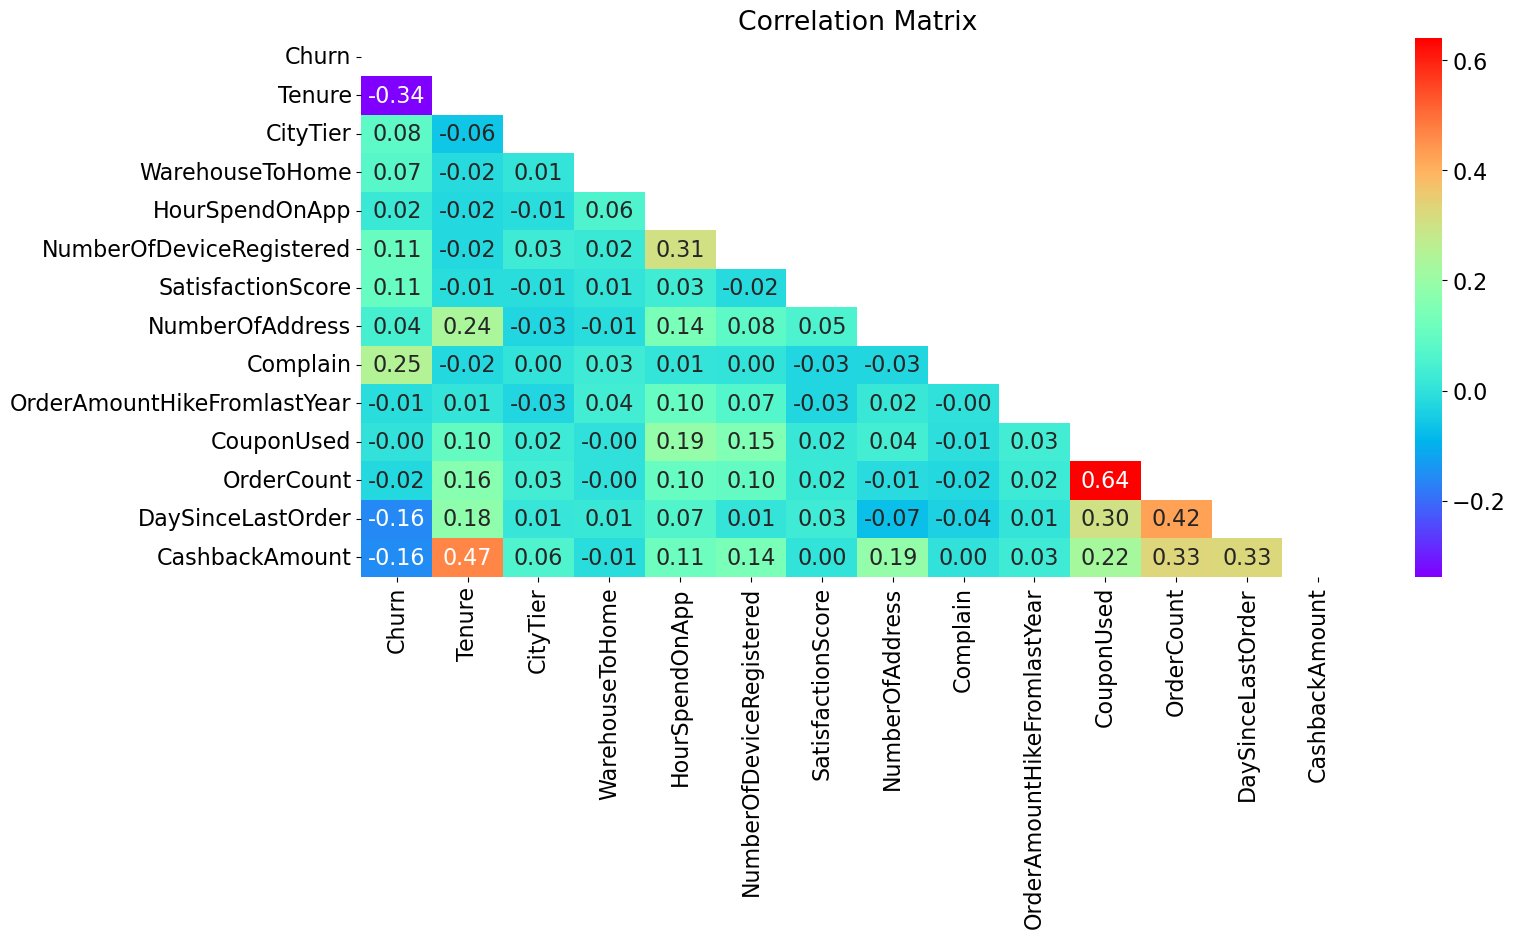

In [62]:
## We will use the correlation coefficient to find out the relationship between variables.
mask = np.zeros_like(df02.corr())
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(16, 7))
sns.heatmap(df02.corr(method='pearson'), mask=mask, cmap='rainbow', annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [63]:
##Descriptive analysis
##Tier type of the city the customer is living in : 'CityTier'
df02['CityTier'].unique()

array([3, 1, 2], dtype=int64)

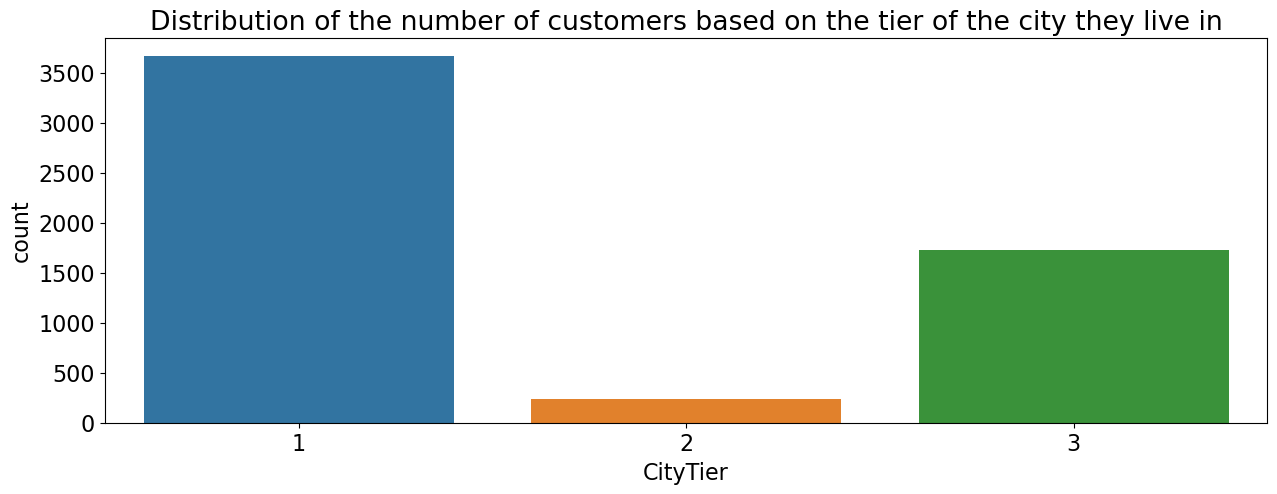

In [64]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='CityTier', data=df02)
plt.title('Distribution of the number of customers based on the tier of the city they live in')
plt.show()

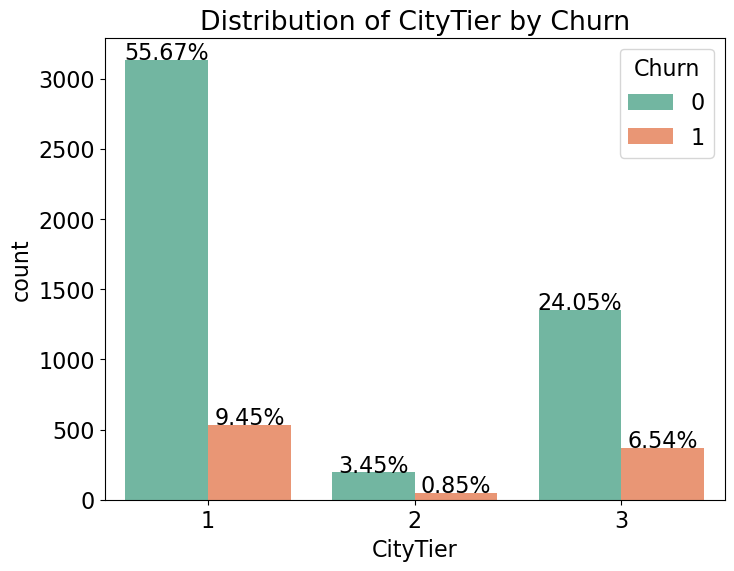

In [65]:
def plotting_percentages(df02, x, hue, palette=None):
    total = float(len(df02))  # Total count of all data points
    
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=x, hue=hue, data=df02, palette=palette)
    plt.title(f'Distribution of {x} by {hue}')
    
    # Adding percentages on top of the bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center"
        )
    
    plt.show()
    
plotting_percentages(df02, 'CityTier', 'Churn', palette='Set2')

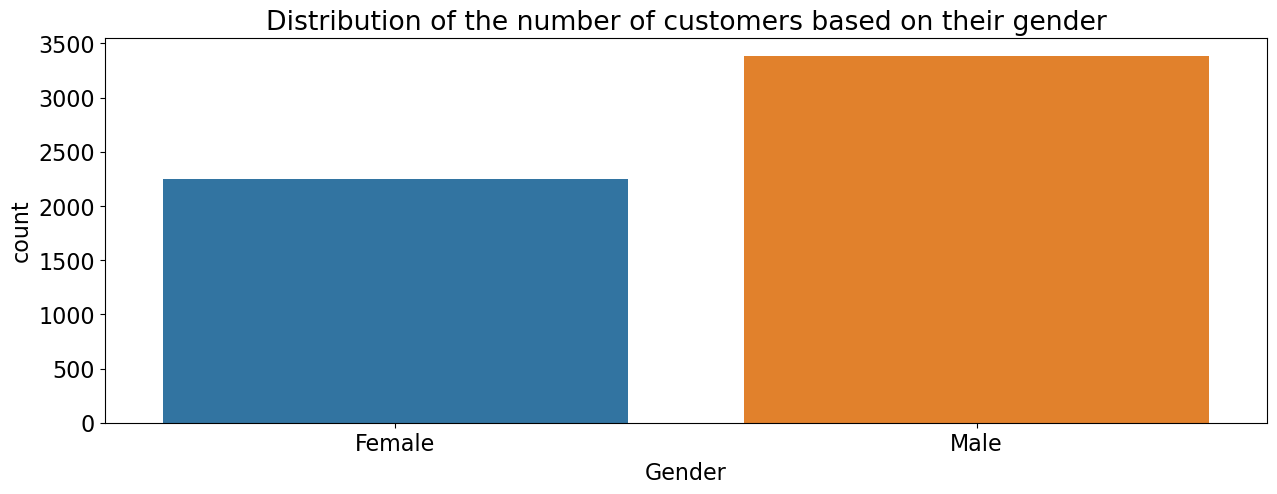

In [66]:
##Gender of customer
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='Gender', data=df02)
plt.title('Distribution of the number of customers based on their gender')
plt.show()

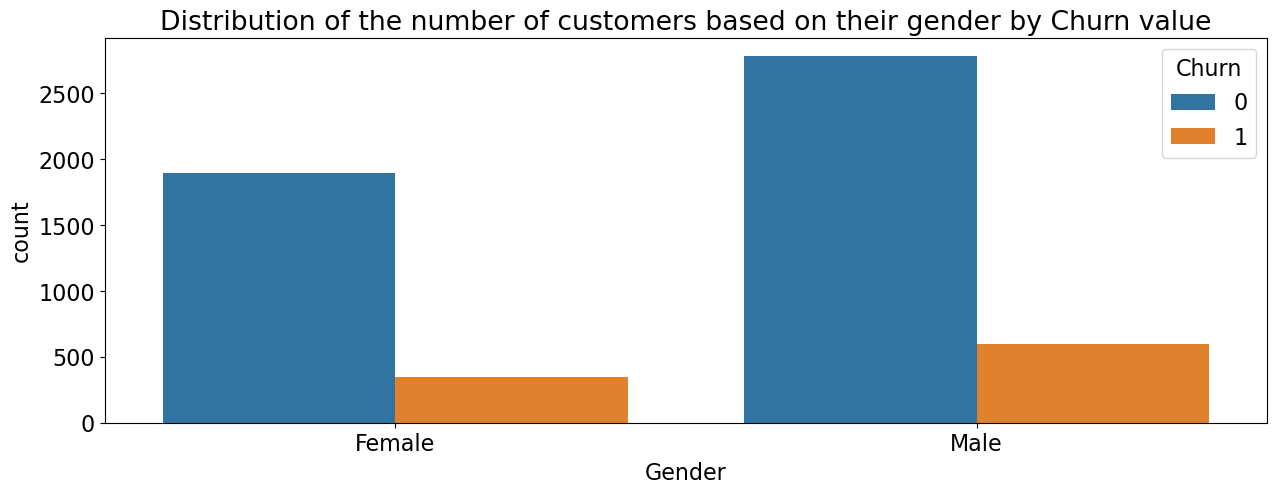

In [67]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='Gender', hue='Churn', data=df02)
plt.title('Distribution of the number of customers based on their gender by Churn value')
plt.show()

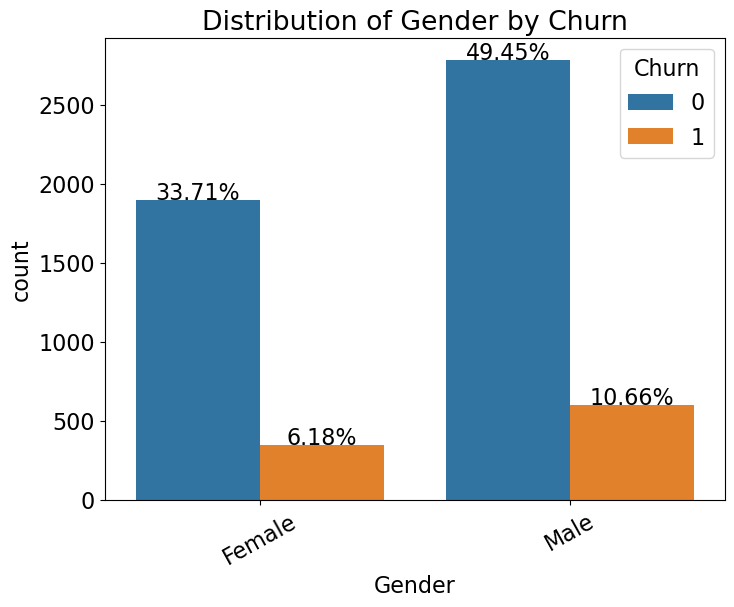

In [68]:
def plotting_percentages(df, x, hue, rotation=0, unique_values=None, palette=None):
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=x, hue=hue, data=df, palette=palette)
    plt.title(f'Distribution of {x} by {hue}')
    
    if unique_values is not None:
        ax.set_xticklabels(unique_values, rotation=rotation)
        total = float(len(df))
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3,
                '{:.2f}%'.format((p.get_height() / total) * 100),
                ha="center")
    
    plt.show()

# Example usage with rotation and unique values for 'Gender' column
plotting_percentages(df02, 'Gender', 'Churn', rotation=29, unique_values=df02['Gender'].unique())


In [69]:
##Marital status of customer : 'MaritalStatus'
df02['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

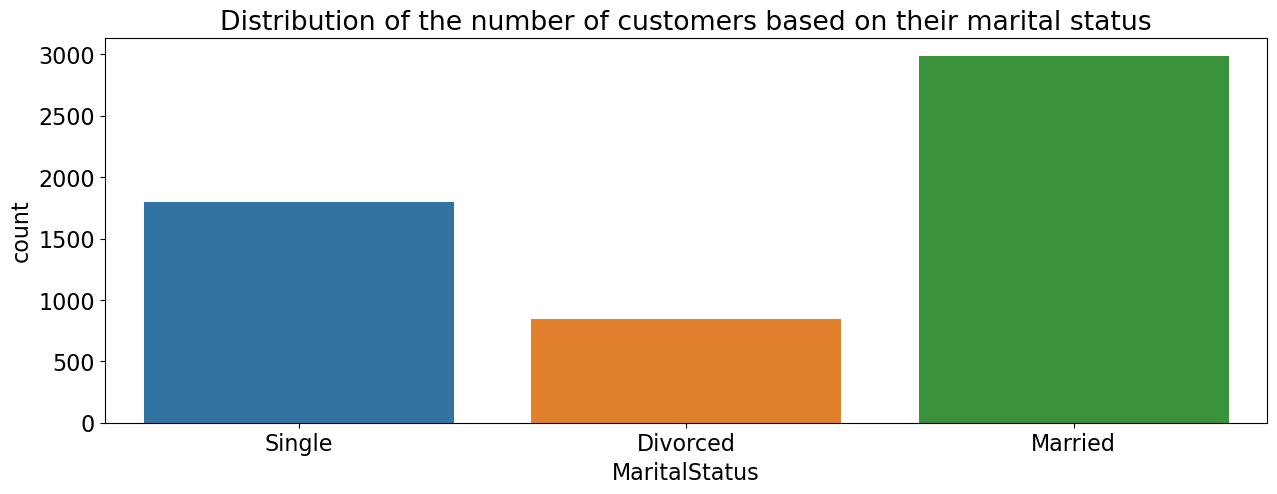

In [70]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='MaritalStatus', data=df02)
plt.title('Distribution of the number of customers based on their marital status')
plt.show()

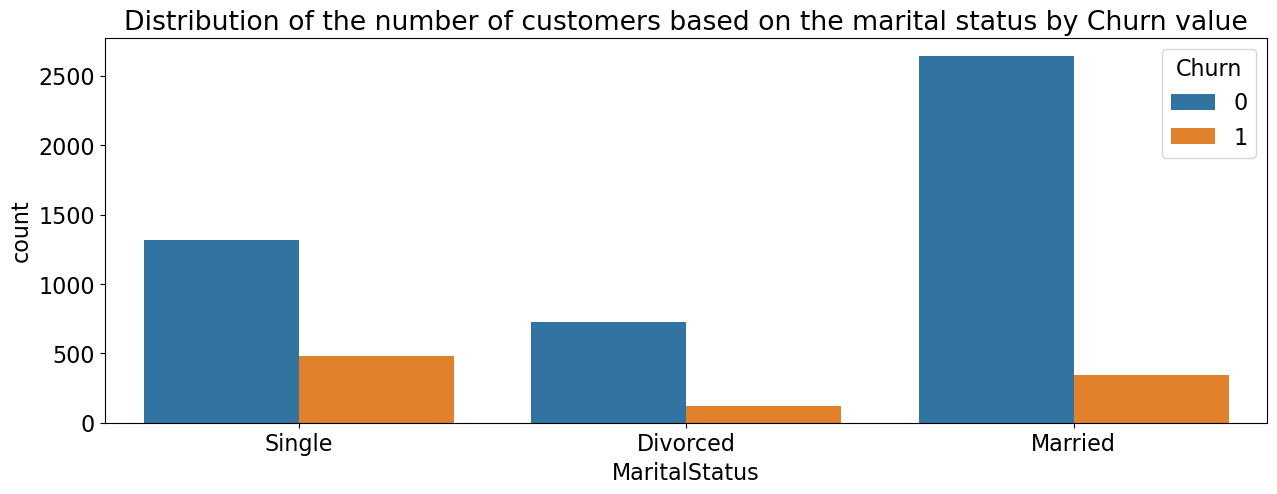

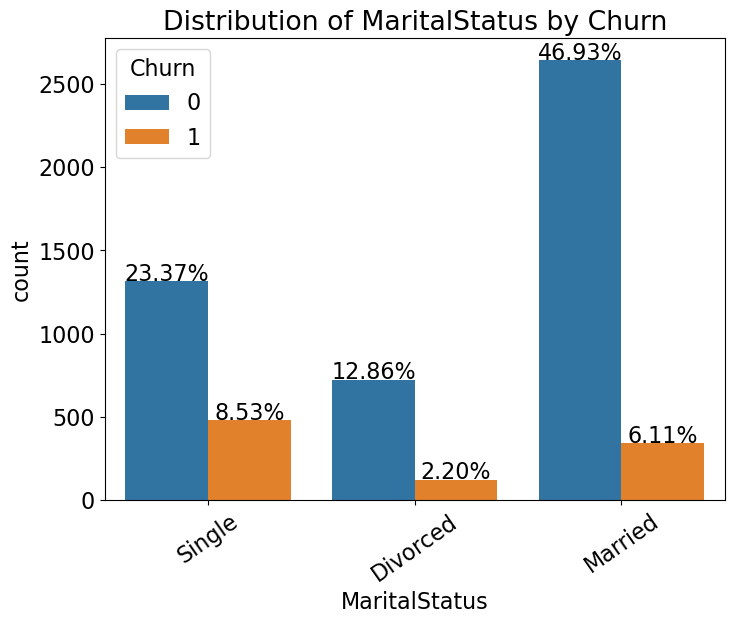

In [71]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='MaritalStatus', hue='Churn', data=df02)
plt.title('Distribution of the number of customers based on the marital status by Churn value')
plt.show()

plotting_percentages(df02, 'MaritalStatus', 'Churn', 35, df02.MaritalStatus.unique())

In [72]:
##NumberOfAddress of customer
df02['NumberOfAddress'].unique()

array([ 9,  7,  6,  8,  3,  2,  4, 10,  1,  5, 19, 21, 11, 20, 22],
      dtype=int64)

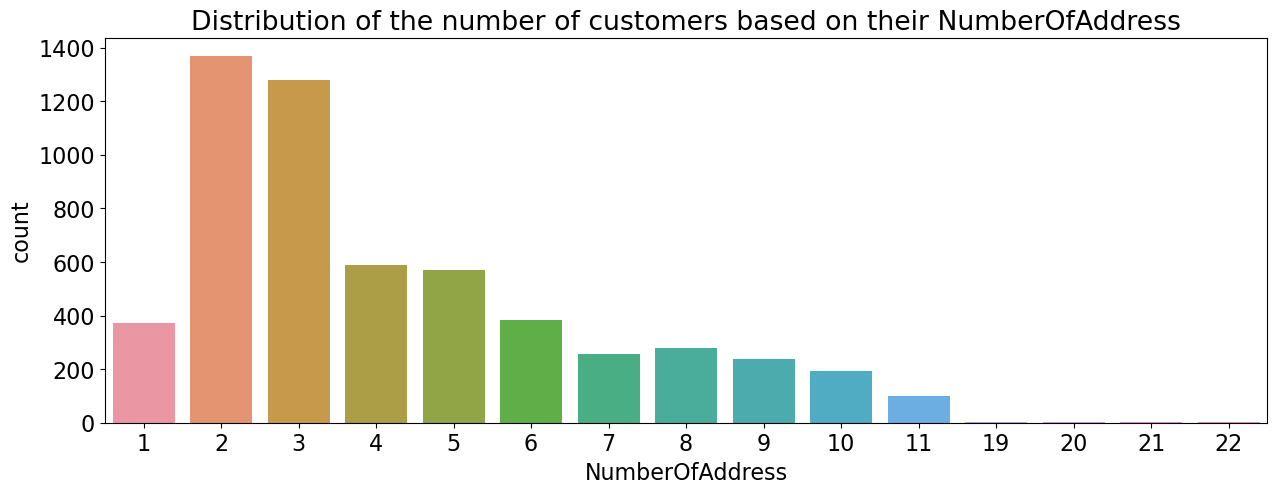

In [73]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='NumberOfAddress', data=df02)
plt.title('Distribution of the number of customers based on their NumberOfAddress')
plt.show()

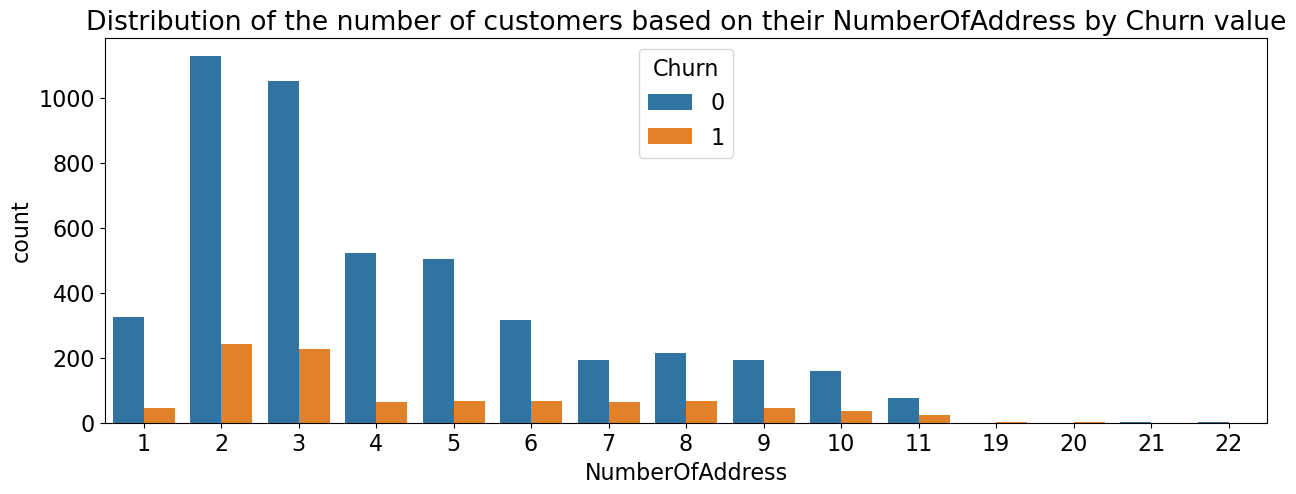

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


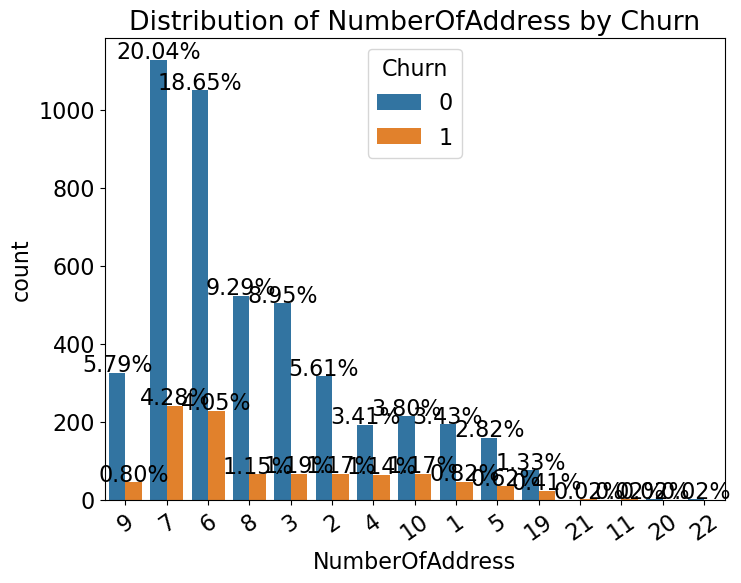

In [74]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='NumberOfAddress', hue='Churn', data=df02)
plt.title('Distribution of the number of customers based on their NumberOfAddress by Churn value')
plt.show()

plotting_percentages(df02, 'NumberOfAddress', 'Churn', 35, df02.NumberOfAddress.unique())

In [75]:
##NumberOfDeviceRegistered
df02['NumberOfDeviceRegistered'].unique()

array([3, 4, 5, 2, 1, 6], dtype=int64)

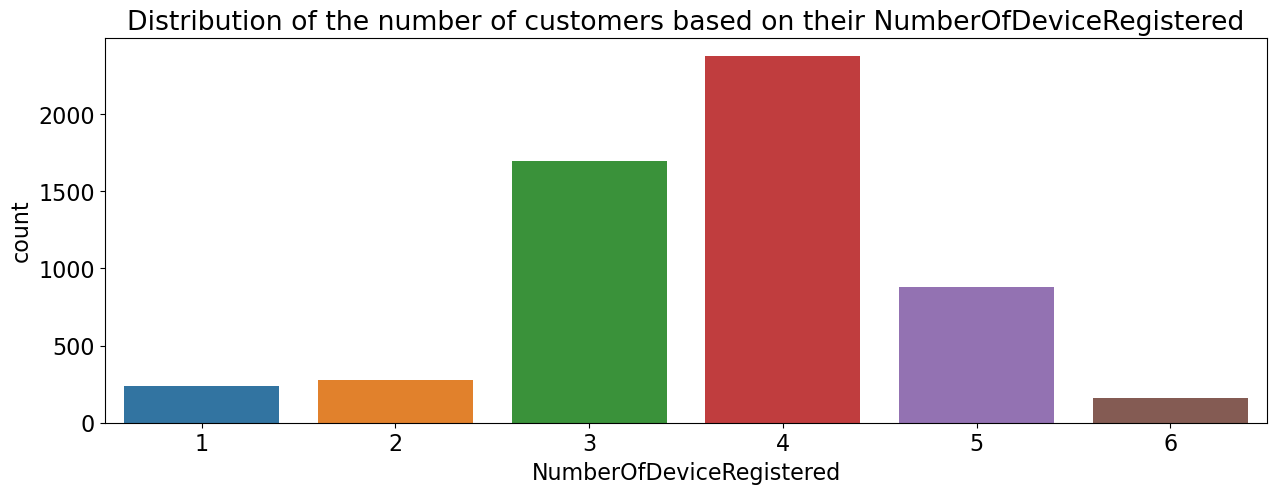

In [76]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='NumberOfDeviceRegistered', data=df02)
plt.title('Distribution of the number of customers based on their NumberOfDeviceRegistered')
plt.show()

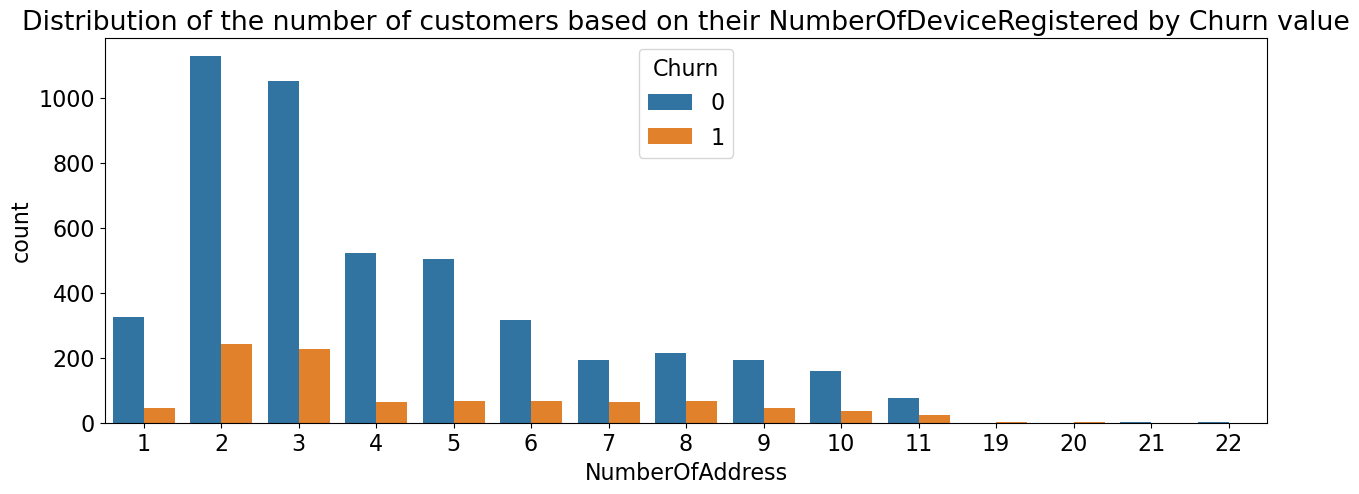

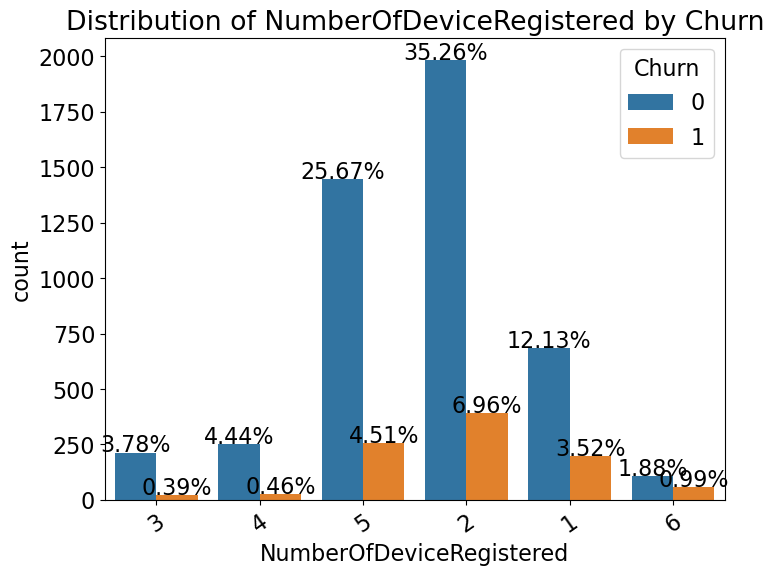

In [77]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='NumberOfAddress', hue='Churn', data=df02)
plt.title('Distribution of the number of customers based on their NumberOfDeviceRegistered by Churn value')
plt.show()

plotting_percentages(df02, 'NumberOfDeviceRegistered', 'Churn', 35, df02.NumberOfDeviceRegistered.unique())

### Feature selection using Statistical Test

In [78]:
# Function to perform statistical test on numerical variables to determine whether to reject or accept H0
def num_stats(num_col):
  group_0 = df02[df02['Churn']==0][num_col]
  group_1 = df02[df02['Churn']==1][num_col]

  _, p_value = stats.ttest_ind(group_0,group_1,equal_var=False)

  print('P-value : ', p_value)
  if(p_value<0.05):
    print('Reject null hypothesis')
  else:
    print('Do not reject null hypotheis')

In [79]:
from scipy import stats  # Import stats module from scipy

# Function to perform statistical test on numerical variables to determine whether to reject or accept H0
def num_stats(num_col):
    group_0 = df02[df02['Churn'] == 0][num_col]
    group_1 = df02[df02['Churn'] == 1][num_col]

    _, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)

    print('P-value:', p_value)
    if p_value < 0.05:
        print('Reject null hypothesis')
    else:
        print('Do not reject null hypothesis')


In [80]:
def chisq_test(cat_col, df):
    CrossTabResult=pd.crosstab(index=df02['Churn'], columns=df02[cat_col])
    ChiSqResult = chi2_contingency(CrossTabResult)
        
    # If the ChiSq P-Value is <0.05, that means we reject H0
    if (ChiSqResult[1] < 0.05):
        print('P-Value :', ChiSqResult[1])
        print('Reject null hypothesis')
    else:
        print('P-Value :', ChiSqResult[1])
        print('Do not reject null hypotheis')  

In [81]:
num_col_list = ['Tenure', 'WarehouseToHome', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
                'DaySinceLastOrder', 'CashbackAmount', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress']

In [82]:
for col in num_col_list:
  print('Column Name : ', col)
  num_stats(col)
  print('---------------------------------------------')

Column Name :  Tenure
P-value: 2.008277595367716e-202
Reject null hypothesis
---------------------------------------------
Column Name :  WarehouseToHome
P-value: 2.1634795329570444e-08
Reject null hypothesis
---------------------------------------------
Column Name :  OrderAmountHikeFromlastYear
P-value: 0.4237779148876236
Do not reject null hypothesis
---------------------------------------------
Column Name :  CouponUsed
P-value: 0.9159384616337447
Do not reject null hypothesis
---------------------------------------------
Column Name :  OrderCount
P-value: 0.06430615371620459
Do not reject null hypothesis
---------------------------------------------
Column Name :  DaySinceLastOrder
P-value: 3.1021436368381747e-39
Reject null hypothesis
---------------------------------------------
Column Name :  CashbackAmount
P-value: 2.778201405098553e-43
Reject null hypothesis
---------------------------------------------
Column Name :  HourSpendOnApp
P-value: 0.14300103213870458
Do not reject 

In [83]:
cat_col_list = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
                'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Gender', 'Complain']

In [84]:
from scipy.stats import chi2_contingency
for col in cat_col_list:
  print('Column Name : ', col)
  chisq_test(col, df02)
  print('---------------------------------------------')

Column Name :  PreferredLoginDevice
P-Value : 1.0756922373255213e-16
Reject null hypothesis
---------------------------------------------
Column Name :  CityTier
P-Value : 1.2612000812079956e-09
Reject null hypothesis
---------------------------------------------
Column Name :  PreferredPaymentMode
P-Value : 9.708708511076305e-15
Reject null hypothesis
---------------------------------------------
Column Name :  PreferedOrderCat
P-Value : 2.7708325346337454e-60
Reject null hypothesis
---------------------------------------------
Column Name :  SatisfactionScore
P-Value : 2.4233349782737515e-14
Reject null hypothesis
---------------------------------------------
Column Name :  MaritalStatus
P-Value : 1.073011277910542e-41
Reject null hypothesis
---------------------------------------------
Column Name :  Gender
P-Value : 0.030820940334890086
Reject null hypothesis
---------------------------------------------
Column Name :  Complain
P-Value : 2.6644609654641377e-78
Reject null hypothesi

In [85]:
##Drop unwanted columns based on the test results
df02.drop(columns=['HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount'], axis=1, inplace=True)

In [86]:
##Encoding Categorical Variables
df02_encoded = pd.get_dummies(df02,columns=cat_col_list)
df02_encoded.head()

,Churn,Tenure,WarehouseToHome,NumberOfDeviceRegistered,NumberOfAddress,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,...,SatisfactionScore_3,SatisfactionScore_4,SatisfactionScore_5,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male,Complain_0,Complain_1
0,1,4.0,6.0,3,9,5.0,160.0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
1,1,10.0,8.0,4,7,0.0,121.0,0,0,1,...,1,0,0,0,0,1,0,1,0,1
2,1,10.0,30.0,4,6,3.0,120.0,0,0,1,...,1,0,0,0,0,1,0,1,0,1
3,1,0.0,15.0,4,8,3.0,134.0,0,0,1,...,0,0,1,0,0,1,0,1,1,0
4,1,0.0,12.0,3,3,3.0,130.0,0,0,1,...,0,0,1,0,0,1,0,1,1,0


In [89]:
# Initialise SMOTE object
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [93]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_columns = df02.select_dtypes(include=['object']).columns.tolist()

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Encode categorical columns
encoded_cols = pd.DataFrame(encoder.fit_transform([categorical_columns]))

# Concatenate encoded columns with remaining columns
df02 = pd.concat([df02.drop(categorical_columns, axis=1), encoded_cols], axis=1)


In [94]:
# Separate independent and dependent variables
X = df02.drop('Churn', axis=1)
y = df02['Churn']

In [95]:
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

In [96]:
# Combine balanced X and y
df02 = pd.DataFrame(x_smote, columns=df02.drop('Churn', axis=1).columns)
df02['Churn'] = y_smote

df02.head()

,Tenure,CityTier,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,4.0,3,6.0,3,2,9,1,5.0,160.0,1
1,10.0,1,8.0,4,3,7,1,0.0,121.0,1
2,10.0,1,30.0,4,3,6,1,3.0,120.0,1
3,0.0,3,15.0,4,5,8,0,3.0,134.0,1
4,0.0,1,12.0,3,5,3,0,3.0,130.0,1


In [97]:
df02.Churn.value_counts()

1    4682
0    4682
Name: Churn, dtype: int64

### Modeling

In [98]:
# Separate dependent and independent variables
X = df02.drop('Churn', axis=1)
y= df02.Churn

In [99]:
#standardise the x value by using standardscaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [100]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.30,random_state =100)

In [101]:
# Checking the target rate in the population, train sample and test sample
print("Population risk rate :", 
      round(sum(df02.Churn)*100/len(df02), 2),"%")
print("Train set risk rate :", 
      round(sum(y_train)*100/len(y_train), 2),"%")
print("Test set risk rate :", 
      round(sum(y_test)*100/len(y_test), 2),"%")

Population risk rate : 50.0 %
Train set risk rate : 50.24 %
Test set risk rate : 49.43 %


##### Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)  

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Classifier:", accuracy)

Accuracy of Random Forest Classifier: 0.9797153024911032


In [104]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[1379   42]
 [  15 1374]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1421
           1       0.97      0.99      0.98      1389

    accuracy                           0.98      2810
   macro avg       0.98      0.98      0.98      2810
weighted avg       0.98      0.98      0.98      2810



#### DecisionTreeClassifier

In [105]:
from sklearn.tree import DecisionTreeClassifier

# Training the model
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [106]:
# Predictions on test data
y_pred = dt_clf.predict(X_test)

In [107]:
from sklearn import metrics

# Evaluation metrics
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))
print('F1-score : ', metrics.f1_score(y_test, y_pred))
print('R2-score : ', metrics.r2_score(y_test, y_pred))
print('ROC-AUC Score :', metrics.roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1421
           1       0.94      0.97      0.95      1389

    accuracy                           0.95      2810
   macro avg       0.95      0.95      0.95      2810
weighted avg       0.95      0.95      0.95      2810

[[1337   84]
 [  47 1342]]
Accuracy : 0.9533807829181494
F1-score :  0.9534635879218472
R2-score :  0.8134989454186382
ROC-AUC Score : 0.9535247032454152



Both sets of evaluation metrics, specifically precision, recall, F1-score, accuracy, and the confusion matrix, suggest that the second model might be performing better than the first one.

#Let's analyze the key metrics from both:

#Model 1:
Precision: Class 0: 0.97, Class 1: 0.94
Recall: Class 0: 0.94, Class 1: 0.97
F1-score: Both classes have an F1-score of 0.95
Accuracy: 0.95
Confusion Matrix: [[1337, 84], [47, 1342]]
Other Metrics: F1-score (0.953), R2-score (0.813), ROC-AUC Score (0.953)
Model 2:
Precision: Class 0: 0.99, Class 1: 0.97
Recall: Class 0: 0.97, Class 1: 0.99
F1-score: Both classes have an F1-score of 0.98
Accuracy: 0.98
Confusion Matrix: [[1379, 42], [15, 1374]]
Comparing these metrics:

Precision and Recall: Model 2 generally has higher precision and recall values for both classes.
F1-score: Model 2 has higher F1-scores for both classes.
Accuracy: Model 2 has a higher accuracy of 0.98 compared to 0.95 in Model 1.
Therefore, based on these metrics, Model 2 appears to be performing better than Model 1. 